# Cuaderno de Notas de Métodos Numéricos
## Método del Punto Fijo
### Prof. Jorge I. Zuluaga


#### Ejecutarme siempre

A continuación descargamos en el espacio virtual de este cuaderno todos los archivos necesarios para que las notas del curso funcionen bien:

In [ ]:
!git clone https://github.com/JorgeZuluaga/NotasMetodosNumericos
!ln -s NotasMetodosNumericos mn
!make -C mn pull

Cloning into 'NotasMetodosNumericos'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 81 (delta 33), reused 61 (delta 13), pack-reused 0
Unpacking objects: 100% (81/81), done.
make: Entering directory '/content/NotasMetodosNumericos'
git reset --hard HEAD
HEAD is now at 2a4d3d7 Commit
git pull origin master
From https://github.com/JorgeZuluaga/NotasMetodosNumericos
 * branch            master     -> FETCH_HEAD
Already up to date.
make: Leaving directory '/content/NotasMetodosNumericos'


## Un vistazo de la clase

  Qué veremos en esta clase:

  - El problema de la raíz de una función.
  - El método del punto fijo.

  Para leer en el libro: sección **Polinomios y series de Taylor**.  

## Motivación

- Un jugador de baloncesto quiere encestar una pelota y necesita calcular el ángulo en el que debe lanzarla.

<img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/ejemplo-baloncesto.png">

## Recordemos

### Motivación

- Considere las siguientes situaciones:

  - Supongamos que se conoce a cuánto está el dólar hoy, se sabe cuánto está cambiando por día y se quiere predecir a cuánto estará mañana.

  - Una cámara de fotodetección observa un vehículo y mide su velocidad.  La policía quiere sabe en que parte de la autopista estará el vehículo 10 minutos después.

  - La temperatura media del planeta esta aumentando.  La última medida indica que estamos a una temperatura 1.6 C por encima de la de la era preindustrial y está aumentando 0.2 C por década.  ¿Cuál será la temperatura en 50 años?

### Nuestro problema escrito como función


- El problema que estamos tratando de resolver se puede representar gráficamente de la siguiente manera:

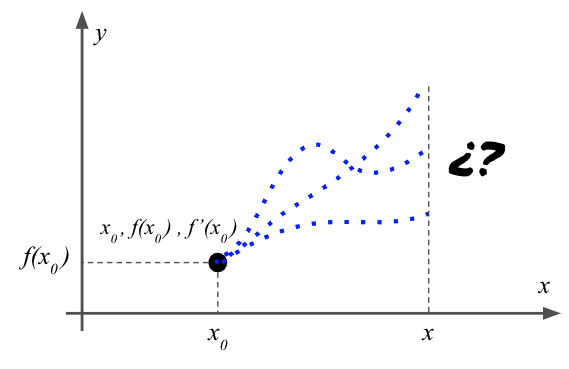

### Aproximaciones de Taylor

- Una generalización de la aproximación de orden $n$:

  $$
  f(x)\approx f(x_0) + f'(x_0) (x-x_0) + \frac{1}{2!} f''(x_0) (x-x_0)^2 + \frac{1}{3!} f'''(x_0) (x-x_0)^3+\cdots+\frac{1}{n!} f^{(n)}(x_0) (x-x_0)^n
  $$

- Aquí $f^{(n)}(x)$ es la derivada de orden $n$ y suponemos que se puede calcular.

- No es muy difícil pensar que en realidad el valor exacto de la función se obtiene si sumamos todos los términos hasta *infinito*.

  $$
  f(x) = f(x_0) + f'(x_0) (x-x_0) + \frac{1}{2!} f''(x_0) (x-x_0)^2 + \frac{1}{3!} f'''(x_0) (x-x_0)^3+\cdots+\frac{1}{n!} f^{(n)}(x_0) (x-x_0)^n + \cdots
  $$

### Series

- Si se suman los primeros términos de una sucesión se forma una **suma parcial**.

  $$
  s_n = a_1 + a_2 + \ldots + a_n = \sum_{i=1}^{n} a_i
  $$

  - Una suma parcial de la sucesión $\{1,1/2,1/3,1/4,\ldots\}$ es:

    $$
    s_3 = 1 + \frac{1}{2} + \frac{1}{3}
    $$

- El conjunto de todas las posibles sumas parciales de una sucesión forma... *otra sucesión*.  A la sucesión de sumas parciales se la llama una **serie**. Simbólicamente:

  $$
  \left\{\sum_{i=1}^{n} a_i\right\}
  $$

   - Ejemplo: de la sucesión $\{1,4,9,16,\ldots\}$ se puede definir la serie: 

   $$
   \{1,1+4,1+4+9,1+4+9+16,\ldots\}
   $$

#### Convergencia de series:

- Como con las sucesiones, las series pueden converger o diverger.  La serie anterior diverge.

- Cuando una serie converge se escribe:

  $$
  \lim_{n\rightarrow\infty} \sum_{i=1}^{n} a_i\ = S
  $$

  alternativamente se puede escribir:

  $$
  S\equiv \sum_{i=1}^{\infty} a_i
  $$

  - Ejemplo 1: la serie 
  $$
  \left\{\sum_{i=1}^{n} \frac{1}{2^i} \right\}
  $$
   converge a $S = 1$

- Se puede escribir un programa en Python para calcular las sumas parciales (términos de la serie)

In [ ]:
def suma_parcial(a,n):
  S = 0
  for i in range(1,n+1):
    S = S + a(i)
  print("La suma parcial es",S)

Ejemplo de serie divergente:

In [ ]:
suma_parcial(lambda n:n**2,1)
suma_parcial(lambda n:n**2,10)
suma_parcial(lambda n:n**2,100)

La suma parcial es 1
La suma parcial es 385
La suma parcial es 338350


In [ ]:
suma_parcial(lambda n:(-1)**(n-1)/n,1)
suma_parcial(lambda n:(-1)**(n-1)/n,10)
suma_parcial(lambda n:(-1)**(n-1)/n,100)
suma_parcial(lambda n:(-1)**(n-1)/n,1000)

La suma parcial es 1.0
La suma parcial es 0.6456349206349207
La suma parcial es 0.688172179310195
La suma parcial es 0.6926474305598223


## Errores en el cálculo de series

- Es posible calcular el valor de convergencia de una serie $S$

  $$
  S\equiv \sum_{i=1}^{\infty} a_i
  $$
  usando como aproximación una suma parcial:

  $$
  S=a_1 + a_2 + \cdots \mathrm{(hasta\;infinito)}
  $$

- La serie se puede dividir en 2 sumas:

  $$
  S=(a_1 + a_2 + \cdots a_{n}) + a_{n+1} + a_{n+2} + \cdots \mathrm{(hasta\;infinito)}
  $$

- Que se puede escribir como:
  $$
  S = \sum_{i=1}^n a_i + \sum_{i=n+1}^{\infty} a_i
  $$

- Si el valor de los términos de la sucesión son progresivamente más pequeños, se puede aproximar:

  $$
  S\approx S_n = \sum_{i=1}^n a_i
  $$
  A esto se le llama la **aproximación de una serie usando sumas parciales**.

- Notese que el valor aproximado calculado antes tiene como error la parte de la suma que se eliminó.  A esa parte se la llama el **residuo de la serie**:

  $$
  R_n=\sum_{i=n+1}^{\infty} a_i
  $$

##### Residuo de la serie usando Python

- El programa en Python que escribimos antes permite calcular el valor aproximado de convergencia de una serie, pero no la serie misma.

- Sin embargo, si los términos sucesivos de la serie son cada vez más pequeños, usando un valor realmente grande de $N$ se puede obtener una buena aproximación a la serie.

- Ejemplo: matemáticamente la serie alternante: 

  $$
  S=\sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n}
  $$
  converge a $S=\ln(2)$.

- Probemos con Python si una suma parcial con $N$ grande se acerca a eso:

In [ ]:
suma_parcial(lambda n:(-1)**(n-1)/n,1000)

La suma parcial es 0.6926474305598223


In [ ]:
import numpy as np
print("El valor de la serie (suma infinita es):",np.log(2))

El valor de la serie (suma infinita es): 0.6931471805599453


- En este caso el residuo de la serie se puede calcular si conocemos el valor de convergencia y el valor de la suma parcial.  Para ello debemos modificar un poco el algorítmo de Python:

In [ ]:
def suma_parcial(a,n):
  S = 0
  for i in range(1,n+1):
    S = S + a(i)
  return S

- Nótese que ahora, en lugar de traducir el paso de la salida como `print` lo traducimos como `return`.  Este comando no muestra nada en pantalla y como regla general debe contener solo variables (o expresiones matemáticas).

- Si un algorítmo devuelva más de un resultado como salida, los valores deben ir separados por coma.

- Usando esta versión modificada del algortimos, ahora si podemos calcular el valor del residuo:

In [ ]:
Sn=suma_parcial(lambda n:(-1)**(n-1)/n,1000)
S=np.log(2)
Rn=S-Sn
print("El valor de la serie es ",Sn,"con un error de",Rn)
print("El residuo es:",Rn)

El valor de la serie es  0.6926474305598223 con un error de 0.0004997500001230337
El residuo es: 0.0004997500001230337


- Al valor del residuo se lo llama también el **error absoluto real**.

## Teoría básica de errores

- Supongamos que en un método numérico se quiere estimar el valor de una variable $x$.

- Supongamos que llamamos $p^*$ al valor real de esa cantidad y $p$ al valor aproximado obtenido con el método.

- Se llama **error absoluto real** a la diferencia:

  $$
  E_a=|p-p^*|
  $$

  Propiedades de los errores absolutos:
  
  - La mayúscula en $E_a$ indica que es un error real.  Naturalmente para conocer el *error real* de una cantidad es necesario conocer su valor exacto $p^*$, lo que no siempre es posible.

  - Los errores absolutos tienen las mismas unidades de la cantidad buscada.  Así si lo que se está calculando es un tiempo, el error debe estar en segundos, minutos, horas, etc.  Si lo que se calcula es una masa el error debe estar en gramos, kilogramos, etc.

- Por otro lado se llama **error relativo real** a la diferencia:

  $$
  E_r=\frac{|p-p^*|}{|p|}
  $$

  Propiedades de los errores relativos:

  - Los errores relativos no tienen unidades.  A menudo se pueden expresar en "%".  Ejemplo: un error en un tiempo de 1%, un error en una masa del 10%.

  - Cuando el valor aproximado $p$ es muy cercano a 0, esta fórmula del error absoluto es inestable y es preferible usar otras alternativas que dependen del problema específico que se busca resolver.

### Cifras significativas y errores

- Es común que en muchos problemas se busque encontrar la solución con una precisión que se da en términos de número de cifras decimales, o mejor de cifras significativas.

- Las cifras significativas son los digitos de un número que se conocen con certeza.  Por ejemplo el número 237 tiene 3 dígitos significativos, pero también los números 2.37, 0.237, 0.0237.  Los ceros a la izquierda de un número no cuentan como cifras significativas. 

- ¿Cuál es la precisión de un número con un número $t$ de dígitos significativos?.  Por ejemplo, si una cantidad la representamos con el número 0.0237 (que tiene 3 digitos significatiovs), estamos diciendo que la cantidad podría estár entre 0.02374 y 0.02366 (al redondear ambos números a 3 dígitos significativos obtenemos siempre 0.0236)

- El error relativo en el caso anterior será: $|p-p*|/|p|\approx 5\times 10^{-3}$.

- Eso permite justificar (más no demostrar) el siguiente resultado (Definición 1.16 en el libro de Burden, Décima edición):

  **Definición**: Se dice que el número $p^*$ se aproxima a $p$ a $t$ digitos significativos si $t$ es el entero negativo más grande para el que 

  $$
  \frac{|p-p^*|}{|p|}\leq 5\times 10^{-t}
  $$

### Estimación del error de una serie

- En el cálculo de una serie, por ejemplo, el error absoluto real es siempre igual al valor absoluto del residuo de la serie:

  $$
  E_a = |R_n| = \left|\sum_{i=n+1}^{\infty} a_i\right|
  $$

- Pero el residuo es algo incalculable por que es una suma infinita.  Sin embargo si los valores de la sucesión son decrecientes, $|a_1|>|a_2|>|a_3|>\ldots$, entonces el primer término de la suma del residuo siempre será el mayor de todos.

- Ejemplo: consideremos la serie geométrica:

  $$
  S = \sum_{i=1}^n \frac{1}{2^n} + \sum_{i=n+1}^{\infty} \frac{1}{2^n}
  $$
  
  - Explícitamente considerando los términos hasta $n=3$
  
  $$
  S = \left(\frac{1}{2}+\frac{1}{4}+\frac{1}{8}\right) + \left(\frac{1}{16}+\frac{1}{32}+\ldots\right)
  $$

  $$
  S = 0.875+\left(\frac{1}{16}+\frac{1}{32}+\ldots\right)
  $$
  
  - Miremos que el residuo tiene como primer término $1/16$ y todos los demás serán más pequeños.

  - Podemos decir que el error de estimar la serie con la suma parcial hasta $n$ es un poco mayor que el primer término del residuo:
  $$
  E_a \gtrsim \frac{1}{16} = 0.0625
  $$
    que no es tan malo si consideramos que el valor real del residuo es 0.135.


##### Programa en python con estimación del error

- Un algoritmo que calcula una suma parcial y un estimativo del error puede ser entonces:

In [ ]:
def suma_parcial(a,n):
  S = 0
  for i in range(1,n+1):
    S = S + a(i)
  E = abs(a(i+1))
  return S,E

Probemos:

In [ ]:
Sn,En=suma_parcial(lambda n:1/2**n,10)
S=1
Ea=S-Sn
print("El error absoluto real:",Ea)
print("El error estimado:",En)

El error absoluto real: 0.0009765625
El error estimado: 0.00048828125


### La misteriosa variable $\xi$

- Una manera alternativa de estimar el error de convergencia de una serie.  

  $$
  E_a = |R_n| = \left|\sum_{i=n+1}^{\infty} a_i\right|
  $$

  Se aprovecha de una propiedad de las funciones.

- Supongamos que el valor de la serie depende una variable $x$:
  
  $$
  S(x)\equiv \sum_{i=1}^{\infty} a_i(x)
  $$

  de modo que el error también es función de x:

  $$
  E_a(x) = |R_n(x)| = \left|\sum_{i=n+1}^{\infty} a_i(x)\right|
  $$

- Ejemplo: considere la serie geométrica:

  $$
  S(x)\equiv \sum_{i=1}^{\infty} \frac{1}{x^i}
  $$
  habíamos visto que para $x=2$ esta serie converge a 1, es decir $S(2)=1$.

- Dijimos que una manera de aproximar el error, es usar el primer término de esta serie $a_{n+1}(x)$ como una cota inferior.  Pero vimos que esto no es muy preciso.   

- De acuerdo con un teorema del cálculo (*teorema del valor medio*), siempre es posible encontrar un número $\xi$ que depende del valor de $x$, tal que el valor exacto del error es siempre igual al primer término del residuo evaluado en ese número:

  $$
  E_a(x) = |R_n(x)| = a_{n+1}(\xi(x))
  $$

  ¡Este resultado nos será de muuuucha utilidad!

- ¿Pero cuánto vale $\xi$? ¡ni idea! Sin embargo, veremos como esta propiedad matemática puede ser de utilidad para encontrar **cotas superiores** para los errores de la mayoría de los métodos numéricos que estudiaremos en este curso.

#### Ejemplo de determinación de $\xi$


- **Ejemplo**: 
  - Consideremos el caso de la serie geométrica general:
 
    $$
    S(x)\equiv \sum_{i=1}^{\infty} a_i(x)
    $$

    con $x=2$:

    $$
    S(x=2)\equiv \sum_{i=1}^{\infty} \frac{1}{2^i}
    $$

  - Vimos que con $n=3$ el valor del error absoluto es 0135.  
  
  - Ahora bien, el primer término del residuo:
    
    $$  
    R_3(x=2)=\sum_{i=4}^{\infty} \frac{1}{2^n}
    $$
  
    es:

    $$
    a_4(2) = 1/2^4 = 0.0625
    $$

    que no es un estimativo muy bueno del error.

  - Sin embargo si se usa en lugar de $x=2$, el valor $\xi=1.649$ el primer término del residuo será:

    $$
    a_4(1.649) = 1/1.649^4 = 0.135
    $$

    es decir en este caso $\xi(2)=1.649$.

## Serie de Taylor


- Volviendo a nuestro problema original habíamos visto que:

  $$
  f(x) = f(x_0) + f'(x_0) (x-x_0) + \frac{1}{2!} f''(x_0) (x-x_0)^2 + \frac{1}{3!} f'''(x_0) (x-x_0)^3+\cdots+\frac{1}{n!} f^{(n)}(x_0) (x-x_0)^n + \cdots
  $$

- En el lengua de las series esto se puede escribir como:

  $$
  f(x)= \sum_{k=0}^{\infty} \frac{f^{(k)}\left(x_{0}\right)}{k !}\left(x-x_{0}\right)^{k}
  $$

- A esta se la llama la **serie de Taylor**.


## Polinomio de Taylor

- Como hicimos con cualquier serie, el cálculo de la serie de Taylor se puede dividir en dos partes:

   $$
   f(x)= \sum_{k=0}^{n} \frac{f^{(k)}\left(x_{0}\right)}{k !}\left(x-x_{0}\right)^{k} + \sum_{k=n}^{\infty} \frac{f^{(k)}\left(x_{0}\right)}{k !}\left(x-x_{0}\right)^{k}
   $$

   que se pueden escribir como:

   $$
   f(x)= P_n(x) + R_n(x)
   $$

- A la primera parte (la suma parcial) se la llama **Polinomio de Taylor de orden n** de una función $f(x)$:

  $$
  P_n(x)= \sum_{k=0}^{n} \frac{f^{(k)}\left(x_{0}\right)}{k !}\left(x-x_{0}\right)^{k}
  $$

- A la segunda parte se la llama **residuo** o **error de truncamiento** del polinomio de Taylor.

  $$
  R_n(x)=\sum_{k=n}^{\infty} \frac{f^{(k)}\left(x_{0}\right)}{k !}\left(x-x_{0}\right)^{k}
  $$

- Usando el concepto de la variable $\xi$ el error de truncamiento se puede escribir como:

  $$
  R_n(x)=\frac{f^{(k)}\left(\xi(x)\right)}{k !}\left(x-x_{0}\right)^{k}
  $$

## Cálculo algebraico de polinomios de Taylor

- ¿Para qué pueden servir entonces los polinomios de Taylor?

- Si se conoce el valor de una función en un punto $f(x_0)$ y el valor de varias de sus derivadas $f'(x_0), f''(x_0), \ldots, f^{(n)}(x_0)$ en el mismo punto, el polinomio de Taylor $P_n(x)$ permite estimar el valor de la función en un punto distinto $x$:

   $$
   f(x)\approx P_n(x)
   $$

   con error absoluto:

   $$
   E_a = |R_n(x)|
   $$

- Pero es normal que este tipo de situaciones no se den muy común en la práctica, porque normalmente se conoce la función y su primera derivada, pero las demás derivadas difícilmente.

- Otra posibilidad es la de usar los polinomios de Taylor para escribir una función conocida, pero cuyo cálculo sea difícil de hacer, usando un polinomio.

### Un ejemplo de polinomio de Taylor

**Ejemplo**.  Para la función $f(x)=\cos x$ determine el segundo polinomio de Taylor alrededor de $x_0 = 0$ y el residuo.

**Solución**.  

  - El segundo polinomio de Taylor de una función $f(x)$ es:

  $$
  P_2(x) = f(x_0) + f'(x_0) (x-x_0) + \frac{1}{2!} f''(x_0) (x-x_0)^2 
  $$

  - El valor de la función y sus derivadas en $x_0$ es:

  $$
  f(x_0)=\cos(x_0)=\cos 0 = 1
  $$

  $$
  f'(x_0)=-\sin(x_0)=-\sin 0 = 0
  $$

  $$
  f''(x_0)=-\cos(x_0)=-\cos 0 = -1
  $$

  - Reemplazando obtenemos:

  $$
  P_2(x)= 1 + 0 (x-0) - 1 (x-0)^2 = 1 - x^2
  $$

  - El residuo por otro lado es:

  $$
  R_2(x)=\frac{1}{3!} f'''(\xi(x)) (x-x_0)^2
  $$

  - Necesitamos la tercera derivada:

  $$
  f'''(\xi)=\sin(\xi)
  $$

  - La función residuo queda:

  $$
  R_2(x)=x^3 \frac{1}{6} x^3\sin(\xi)
  $$

  - Es decir, la función $\cos x$ se puede aproximar para valores cercanos a 0 con el polinomio:

  $$
  \cos x \approx 1 - x^2
  $$

  Con un error absoluto igual a:

  $$
  E_a=\left|\frac{1}{6} x^3\sin(\xi)\right|
  $$

## Continuará...

## Ejercicios

1. (Pendiente)